<div style="display:fill;border-radius:10px;
            font-family:Nexa;background-color:#1B1918">
    <h1 id="head_1" style="padding:10px;color:white;font-size:200%;text-align:center;
              font-weight: bold;text-transform: uppercase;">imports</h1>
</div>

In [1]:
import os
import csv
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras 
from keras import models
from keras import applications
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import *
from keras.models import *
from keras import backend as K
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

<img src="https://github.com/Ruddy9501/Kaggle-competitions/blob/main/Digit%20Recognizer/img/numbers2.png?raw=true" width=100% height=auto> 

<div style="display:fill;border-radius:10px;
            font-family:Nexa;background-color:#1B1918">
    <h1 id="head_2" style="padding:10px;color:white;font-size:200%;text-align:center;
              font-weight: bold;text-transform: uppercase;">data loading</h1>
</div>

<p style="font-size:150%;">We read the training data, test data and sample submissions.</p>

In [2]:
train  = pd.read_csv('../input/digit-recognizer/train.csv')
test   = pd.read_csv('../input/digit-recognizer/test.csv')
sample = pd.read_csv('../input/digit-recognizer/sample_submission.csv')

X = np.array(train.iloc[:, 1:])
Y = np.array(train.iloc[:, 0])
test = test.to_numpy()

n = X.shape[0]
m = X.shape[1]

print("Number of training samples: ", n)
print ("Number of features: ", m)

Number of training samples:  42000
Number of features:  784


<p style="font-size:150%;">Now we check for missing values.</p>

In [3]:
np.sum(np.isnan(X))

0

In [4]:
np.sum(np.isnan(Y))

0

In [5]:
np.sum(np.isnan(test))

0

<div style="display:fill;border-radius:10px;
            font-family:Nexa;background-color:#1B1918">
    <h1 id="head_3" style="padding:10px;color:white;font-size:200%;text-align:center;
              font-weight: bold;text-transform: uppercase;">Data display</h1>
</div>

<p style="font-size:150%;">Let's see some randomly selected images from the dataset.</p>

                                                                   Random examples                                                                    


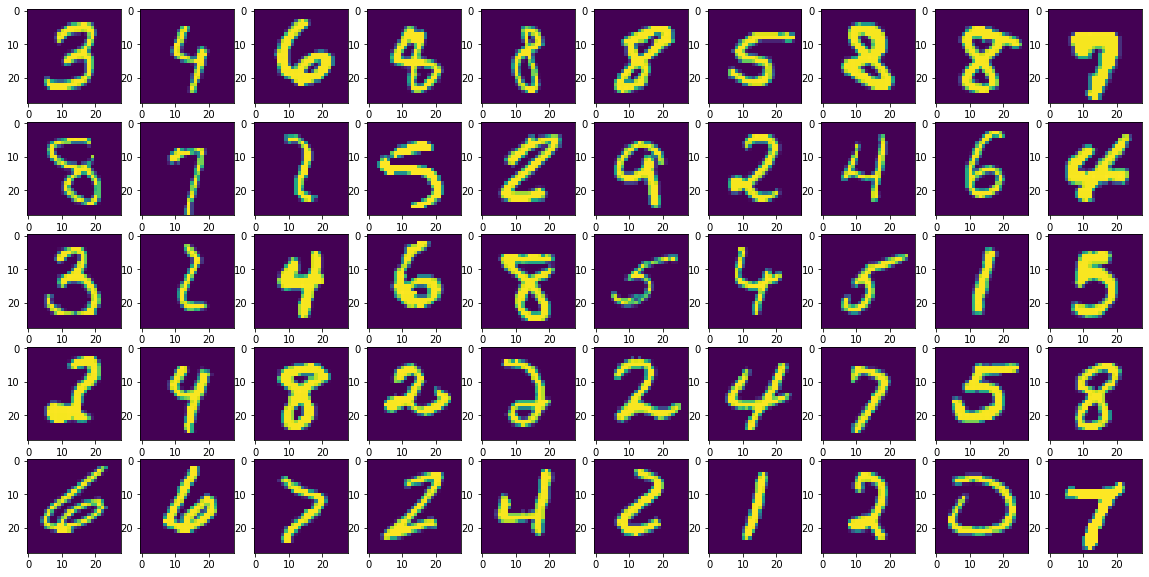

In [6]:
index = np.random.randint(0, n, 50)
plt.figure(figsize = (20, 10))
for i, idx in enumerate(index):
    plt.subplot(5, 10, i+1)
    plt.imshow(np.resize(X[idx], (28, 28, 1)))
print("Random examples".center(150))   
plt.show()

<p style="font-size:150%;">We show the number of examples of each label. As you can see the training data is balanced.</p>

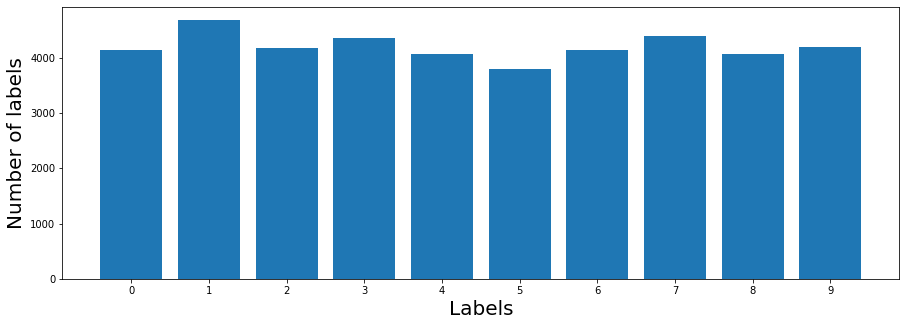

In [7]:
x_labels = sorted(list(set(Y)))
y_labels = [Y.tolist().count(i) for i in x_labels]

plt.figure(figsize = (15,5))
plt.ylabel('Number of labels',  fontsize=20)
plt.xlabel('Labels',  fontsize=20)
plt.xticks([i for i in range(len(x_labels))]) 
plt.bar(x_labels, y_labels)
plt.show()

<div style="display:fill;border-radius:10px;
            font-family:Nexa;background-color:#1B1918">
    <h1 id="head_4" style="padding:10px;color:white;font-size:200%;text-align:center;
              font-weight: bold;text-transform: uppercase;">Data preprocessing</h1>
</div>

<p style="font-size:150%;">
In order to train a neural network we perform the following normalizations and transformations:
    <ul style="font-size:150%;">
    <li> Resize the images to $28 \times 28 \times 1$, which will be the input of our neural network.
    <li> Transform the output $Y$ class following a one-hot encoding, becouse we are facing a classification problem with multiple classes.
    <li> Normalize the training data dividing by the maximun value of the features ($255$).
    </ul>
</p>

<div style="display:fill;border-radius:8px;
            font-family:Nexa;background-color:#1B1918">
    <h2 id='head_4_1' style="padding:10px;color:white;font-size:150%;text-align:center;
              font-weight: bold;text-transform: uppercase;">Resize the images</h2>
</div>

In [8]:
print('Dimensions of training data before resizing data: ', X.shape)
print('Dimensions of test data before resizing data: ', test.shape, '\n')

X = np.reshape(X, (X.shape[0], 28, 28, 1))
test = np.reshape(test, (test.shape[0], 28, 28, 1))

print('Dimensions of training data after resizing data: ', X.shape)
print('Dimensions of test data after resizing data: ', test.shape)

Dimensions of training data before resizing data:  (42000, 784)
Dimensions of test data before resizing data:  (28000, 784) 

Dimensions of training data after resizing data:  (42000, 28, 28, 1)
Dimensions of test data after resizing data:  (28000, 28, 28, 1)


<div style="display:fill;border-radius:8px;
            font-family:Nexa;background-color:#1B1918">
    <h2 id='head_4_2' style="padding:10px;color:white;font-size:150%;text-align:center;
              font-weight: bold;text-transform: uppercase;">One-hot encoding</h2>
</div>

In [9]:
print('Example output before one-hot encoding: ', Y[0], '\n')

Y = to_categorical(Y)

print('Example output after one-hot encoding: ', Y[0])

Example output before one-hot encoding:  1 

Example output after one-hot encoding:  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


<div style="display:fill;border-radius:8px;
            font-family:Nexa;background-color:#1B1918">
    <h2 id='head_4_3' style="padding:10px;color:white;font-size:150%;text-align:center;
              font-weight: bold;text-transform: uppercase;">Normalize the training data</h2>
</div>

In [10]:
print('Minimum value of the features before normalization: ', np.min(X))
print('Maximum value of features before normalization: ', np.max(X), '\n')

X = X / 255.0
test = test / 255.0

print('Minimum value of the features before normalization: ', np.min(X))
print('Maximum value of features before normalization: ', np.max(X))

Minimum value of the features before normalization:  0
Maximum value of features before normalization:  255 

Minimum value of the features before normalization:  0.0
Maximum value of features before normalization:  1.0


<div style="display:fill;border-radius:10px;
            font-family:Nexa;background-color:#1B1918">
    <h1 id="head_5" style="padding:10px;color:white;font-size:200%;text-align:center;
              font-weight: bold;text-transform: uppercase;">Division in train and test</h1>
</div>

<p style="font-size:150%;">
We will split the train set into two new sets $p$  and $v$ . Basically, we will use the train set $p$ to train the model and the validation set $v$ to estimate the hyperparameters. The train set was divided into $80\%$ for $p$ and $20\%$ for $v$.
</p>

In [11]:
indexs = np.arange(n)
posicion = int(n * 0.8)

X_train_p = X[indexs[:posicion]]
X_train_v = X[indexs[posicion:]] 
Y_train_p = Y[indexs[:posicion]]
Y_train_v = Y[indexs[posicion:]]

print(X_train_v.shape)
print("Number of examples of X_train_p: ", X_train_p.shape[0])
print("Number of examples of X_train_v: ", X_train_v.shape[0])

(8400, 28, 28, 1)
Number of examples of X_train_p:  33600
Number of examples of X_train_v:  8400


<div style="display:fill;border-radius:10px;
            font-family:Nexa;background-color:#1B1918">
    <h1 id="head_6" style="padding:10px;color:white;font-size:200%;text-align:center;
              font-weight: bold;text-transform: uppercase;">Data aumentation</h1>
</div>

<p style="font-size:150%;">
We apply <b>Data Augmentation</b>, with this set of techniques we will increase the amount of data by adding modified copies of existing data. Data augmentation makes machine learning more robust by creating variations in the model. For this we will perform some transformations on the images:
</p>
<ul style="font-size:150%;">
<li>Rotation.
<li> Zoom.
<li> Horizontal displacements.
<li> Vertical displacements.
</ul>


In [12]:
data_gen = ImageDataGenerator(validation_split = 0.2, rotation_range = 10, zoom_range = 0.1, width_shift_range = 0.1, height_shift_range = 0.1)

<div style="display:fill;border-radius:10px;
            font-family:Nexa;background-color:#1B1918">
    <h1 id="head_7" style="padding:10px;color:white;font-size:200%;text-align:center;
              font-weight: bold;text-transform: uppercase;">Model training</h1>
</div>

<p style="font-size:150%;">
In order to improve the classification rate we will use an <b>Ensemble Method</b>. This technique creates multiple models and combines them to produce improved results. Ensemble methods often produce more accurate solutions than single model solutions. Therefore we will use $7$ models. Each model will make its prediction and the top voted class will be the predicted one.
</p>

In [13]:
# Create the model
n_models = 7
model = [0] * n_models
inputs = Input(shape = (28, 28, 1))
for i in range(n_models):
    model[i] = Conv2D(64, kernel_size  = (5, 5), padding = 'same', activation = 'relu')(inputs)
    model[i] = BatchNormalization()(model[i])
    model[i] = Conv2D(64, kernel_size  = (5, 5), padding = 'same',activation = 'relu')(model[i])
    model[i] = BatchNormalization()(model[i])
    model[i] = MaxPooling2D(pool_size  = (2, 2))(model[i])
    model[i] = Dropout(0.5)(model[i])
    model[i] = Conv2D(128, kernel_size = (5, 5), padding = 'same', activation = 'relu')(model[i])
    model[i] = BatchNormalization()(model[i])
    model[i] = Conv2D(128, kernel_size = (5, 5), padding = 'same', activation = 'relu')(model[i])
    model[i] = BatchNormalization()(model[i])
    model[i] = MaxPooling2D(pool_size  = (2, 2))(model[i])
    
    model[i] = Flatten()(model[i])

    model[i] = Dropout(0.5)(model[i])
    model[i] = Dense(256, activation = 'relu')(model[i])
    model[i] = BatchNormalization()(model[i])
    model[i] = Dropout(0.5)(model[i])
    model[i] = Dense(10, activation   = 'softmax')(model[i])

2022-04-28 10:45:31.061151: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-28 10:45:31.180926: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-28 10:45:31.181677: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-28 10:45:31.182744: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

<p style="font-size:150%;">
    To mitigate overtraining we apply <b>Early Stopping</b>.
<p style="font-size:150%;">

In [14]:
for i in range(n_models):
    model[i] = Model(inputs = inputs, outputs = model[i])
    model[i].compile(optimizer = Adam(0.00001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='model.h5',
        monitor='val_loss', save_best_only=True, verbose=1),
    EarlyStopping(monitor='val_loss', patience=20,verbose=1)
]

<p style="font-size:150%;">
    We show the summary of one of the models.
</p>

In [15]:
model[0].summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 64)        1664      
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        102464    
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0     

<p style="font-size:150%;">
    We start the training of the network. We specify the training sets and the number of iterations. We will save all the information in the history variable $h$ so that later we can plot the obtained result.
</p>

In [16]:
h = [0] * n_models
for i in range(n_models): 
    data_train = data_gen.flow(X_train_p, Y_train_p, shuffle = True, subset = 'training', batch_size = 32)
    h[i] = model[i].fit(data_train, validation_data = (X_train_v, Y_train_v), batch_size = 64, epochs = 200, callbacks = callbacks_list)

2022-04-28 10:45:34.372573: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200


2022-04-28 10:45:35.961332: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


840/840 [==============================] - 18s 13ms/step - loss: 2.5888 - accuracy: 0.2829 - val_loss: 0.6605 - val_accuracy: 0.8001

Epoch 00001: val_loss improved from inf to 0.66054, saving model to model.h5
Epoch 2/200
840/840 [==============================] - 12s 14ms/step - loss: 1.5403 - accuracy: 0.5262 - val_loss: 0.3076 - val_accuracy: 0.9046

Epoch 00002: val_loss improved from 0.66054 to 0.30761, saving model to model.h5
Epoch 3/200
840/840 [==============================] - 11s 13ms/step - loss: 1.0613 - accuracy: 0.6651 - val_loss: 0.2003 - val_accuracy: 0.9361

Epoch 00003: val_loss improved from 0.30761 to 0.20026, saving model to model.h5
Epoch 4/200
840/840 [==============================] - 11s 14ms/step - loss: 0.7849 - accuracy: 0.7483 - val_loss: 0.1612 - val_accuracy: 0.9488

Epoch 00004: val_loss improved from 0.20026 to 0.16117, saving model to model.h5
Epoch 5/200
840/840 [==============================] - 11s 13ms/step - loss: 0.6320 - accuracy: 0.8003 - val

<div style="display:fill;border-radius:8px;
            font-family:Nexa;background-color:#1B1918">
    <h2 id='head_7_1' style="padding:10px;color:white;font-size:150%;text-align:center;
              font-weight: bold;text-transform: uppercase;">confusion matrix</h2>
</div>

<p style="font-size:150%;">
The confusion matrix is a very useful tool for assessing how good a classification model based on machine learning is. In particular, it serves to show explicitly when one class is confused with another, which allows us to work separately with different types of errors. 
</p>

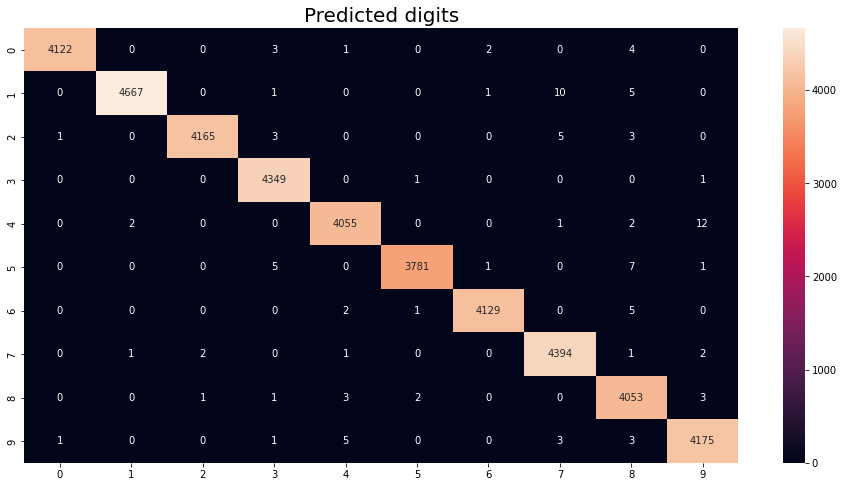

In [17]:
result = np.zeros((X.shape[0], 10))
for i in range(n_models):
    result = result + model[i].predict(X)
    
y_pred = result.argmax(axis = 1)
y_real = Y.argmax(axis = 1)

plt.figure(figsize = (16,8))
plt.title('Predicted digits', size=20)
sns.heatmap(confusion_matrix(y_real, y_pred), annot=True, fmt = '.0f')
plt.show()

<div style="display:fill;border-radius:8px;
            font-family:Nexa;background-color:#1B1918">
    <h2 id='head_7_2' style="padding:10px;color:white;font-size:150%;text-align:center;
              font-weight: bold;text-transform: uppercase;">history</h2>
</div>

<p style="font-size:150%;">
    We show the history of the behavior for the cost function in the training and validation sets for one model.
</p>

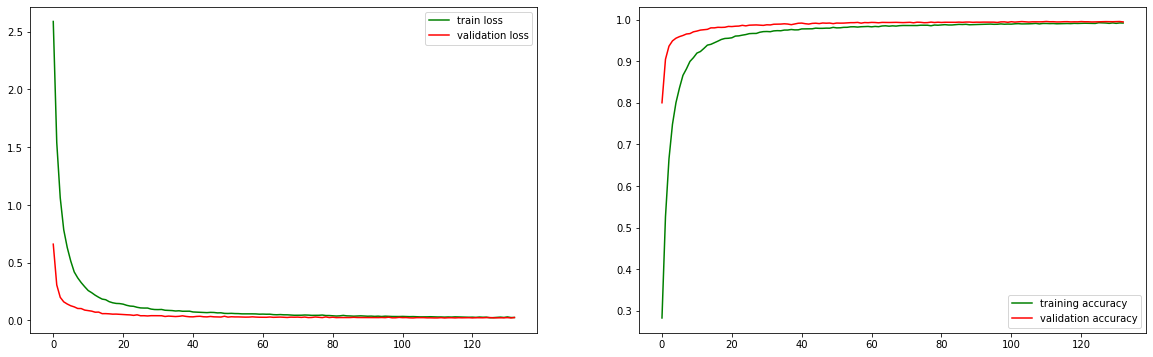

In [18]:
plt.figure(figsize = (20,6))
plt.subplot(1, 2, 1)
plt.plot(h[0].history['loss'], 'g', label = 'train loss')
plt.plot(h[0].history['val_loss'], 'r', label = 'validation loss')
plt.legend(['train loss', 'validation loss'], loc ='best')

plt.subplot(1, 2, 2)
plt.plot(h[0].history['accuracy'], 'g', label = 'training accuracy')
plt.plot(h[0].history['val_accuracy'], 'r', label = 'validation accuracy')
plt.legend(['training accuracy', 'validation accuracy'], loc ='best')
plt.show()

<div style="display:fill;border-radius:10px;
            font-family:Nexa;background-color:#1B1918">
    <h1 id="head_8" style="padding:10px;color:white;font-size:200%;text-align:center;
              font-weight: bold;text-transform: uppercase;">Classification of test examples</h1>
</div>

<p style="font-size:150%;">
Then we classify the test examples. We chose the class <b>most voted</b> by the $7$ models.
</p>

In [19]:
result = np.zeros((test.shape[0], 10))
for i in range(n_models):
    result = result + model[i].predict(test)

y_pred = result.argmax(axis = 1)
sample.iloc[:,1] = y_pred

<p style="font-size:150%;">
    Finally, we save the classified examples.
</p>

In [20]:
sample.to_csv('./submission.csv', index = False)

<p style="font-size:150%;">
Any <b>comments</b>, <b>advice</b> for improvement or <b>doubts</b> will be very helpful. Also, if you have found this work helpful, an <b>Upvotes</b> would be great! :)
</p>
